### Comparing root-zone and surface soil moisture (GLEAM data) for the regions
* Data were extracted via QGIS-SAGA on my Mac (I might change to SQL to maintain a pattern with other data)

In [2]:
import pandas as pd
import pylab as plt
import numpy as np
plt.style.use('classic')
print(plt.style.available)

['seaborn', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-poster', 'bmh', 'seaborn-notebook', 'dark_background', 'grayscale', 'seaborn-dark', 'seaborn-bright', 'seaborn-white', 'seaborn-pastel', 'seaborn-muted', 'seaborn-whitegrid', 'classic', 'ggplot', 'fivethirtyeight', 'seaborn-paper', 'seaborn-ticks', 'seaborn-colorblind', 'seaborn-talk', 'seaborn-dark-palette']


In [3]:
def prepara(file):
    r = pd.read_csv(file)
    r.sort_index(axis=1, inplace=True)

    r.index = r['subgrupo']

    r = r.T
    r = r.iloc[:-10]
    r.index = pd.to_numeric(r.index)
    r.index = pd.to_datetime(r.index,format="%Y%j")
    print(r.tail(3))
    return r

In [4]:
root_anom = prepara('../SQL/SMroot_anomalies.csv')
surf_anom = prepara('../SQL/SMsurf_anomalies.csv')

subgrupo       cn-PR     no-RS     co-PR      ce-PR    sul-PR
2017-10-15 -0.391387  0.878707 -0.186703  -0.206696   0.17435
2017-10-22  0.120114  0.741701  0.674233  0.0440244  0.647401
2017-10-29   1.00482  0.596059   1.34831   0.847741   1.16908
subgrupo       cn-PR     no-RS     co-PR     ce-PR     sul-PR
2017-10-15 -0.684293  0.686124 -0.373745 -0.336902  0.0737347
2017-10-22  0.794388   0.36222   1.10467  0.616268   0.846823
2017-10-29   1.20621  0.471896   1.44255   1.61479     1.3603


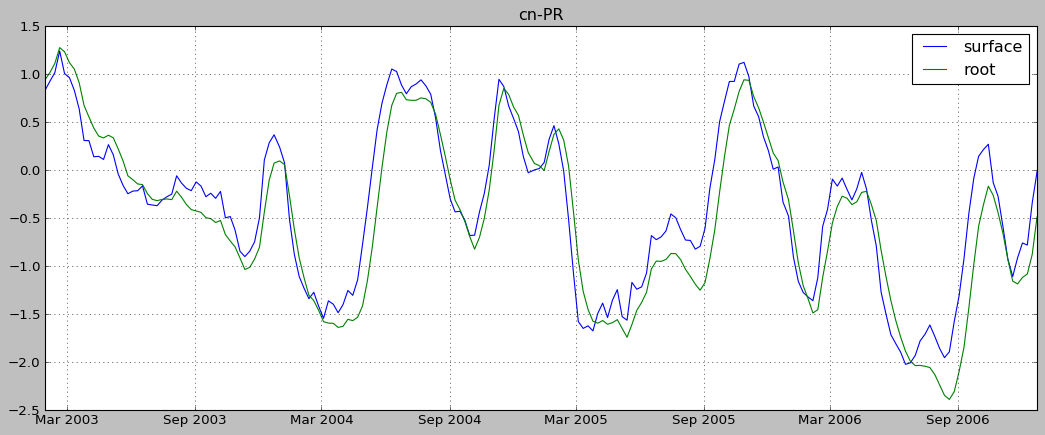

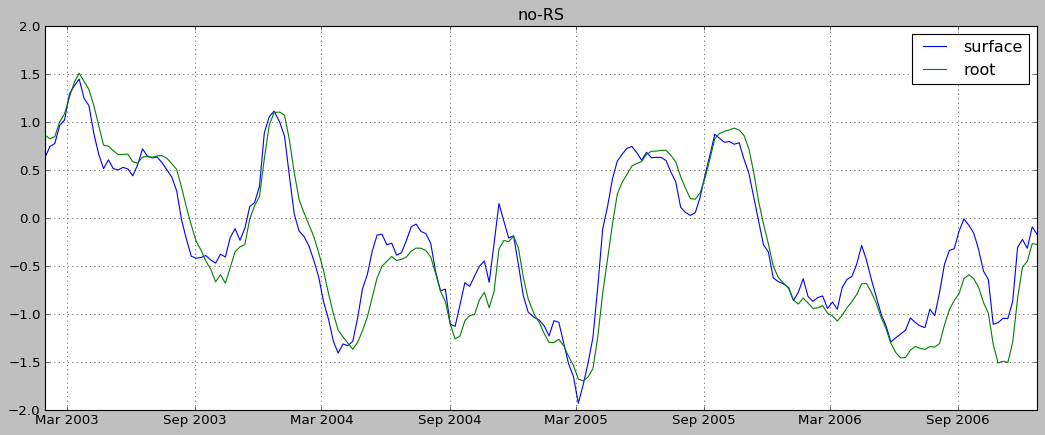

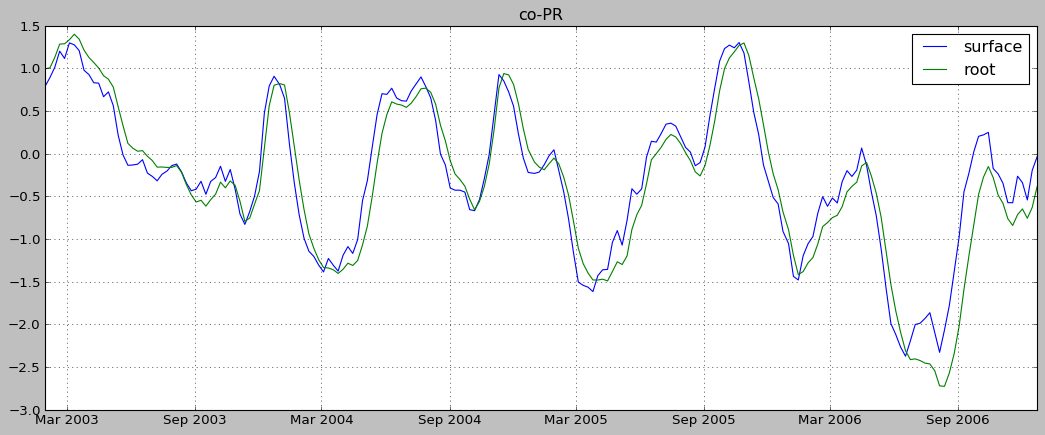

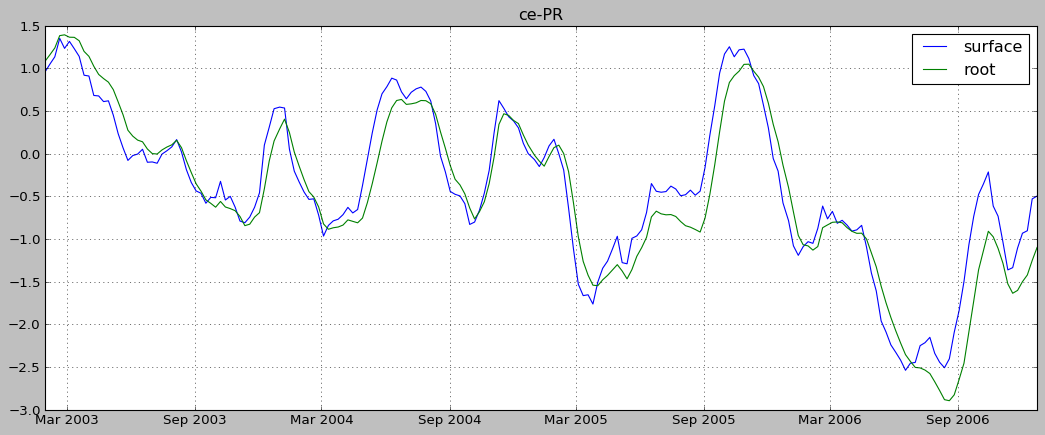

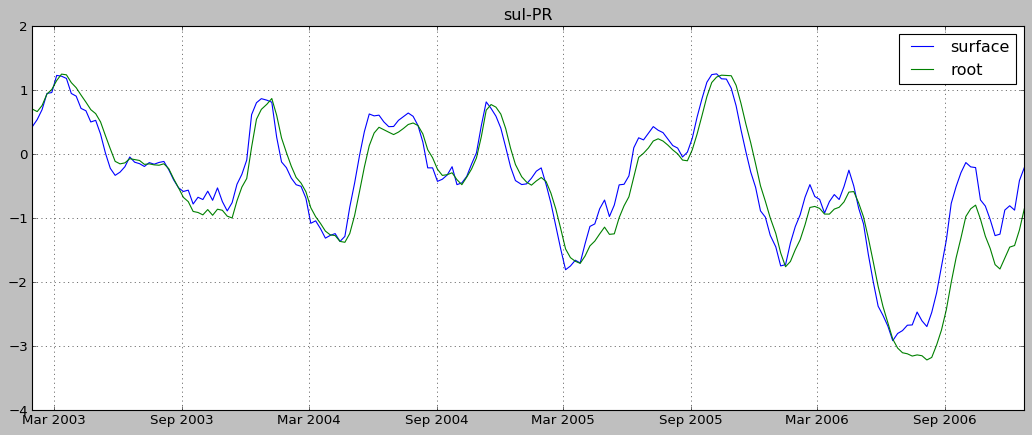

In [5]:
w=5
y1 = '2003'
y2 = '2006'
for region in surf_anom.columns:
    plt.figure(figsize=(16,6))
    plt.plot(surf_anom[region].loc[y1:y2].rolling(w).mean(),label='surface')
    plt.plot(root_anom[region].loc[y1:y2].rolling(w).mean(),label='root')
    plt.title(region);plt.grid();plt.legend();plt.show();plt.close()

In [8]:
surf_abs = prepara('../SQL/SMsurf_absolute.csv')
root_abs = prepara('../SQL/SMroot_absolute.csv')

subgrupo       cn-PR     no-RS     co-PR     ce-PR    sul-PR
2017-10-15  0.367405  0.458262  0.427692  0.382819  0.470322
2017-10-22  0.433124  0.450212  0.476506  0.422892   0.49523
2017-10-29  0.451914  0.449416  0.484625  0.459778  0.507567
subgrupo       cn-PR     no-RS     co-PR     ce-PR    sul-PR
2017-10-15  0.369038  0.450654  0.421505  0.375087  0.460684
2017-10-22  0.391897  0.448072  0.450036  0.386312  0.474726
2017-10-29  0.426184  0.443246  0.466255  0.415425  0.486367


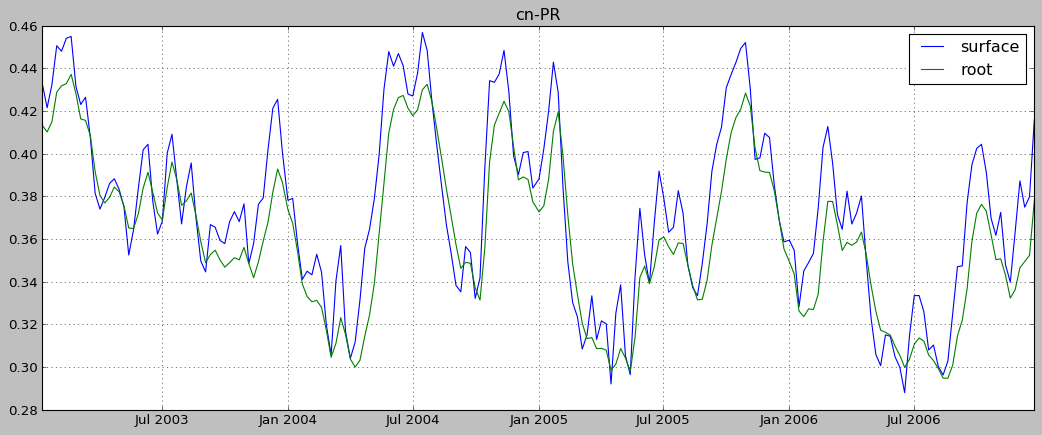

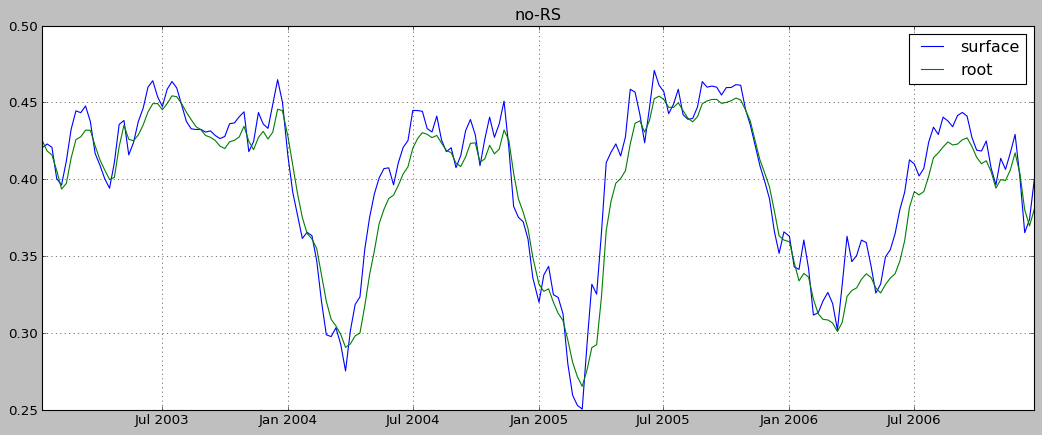

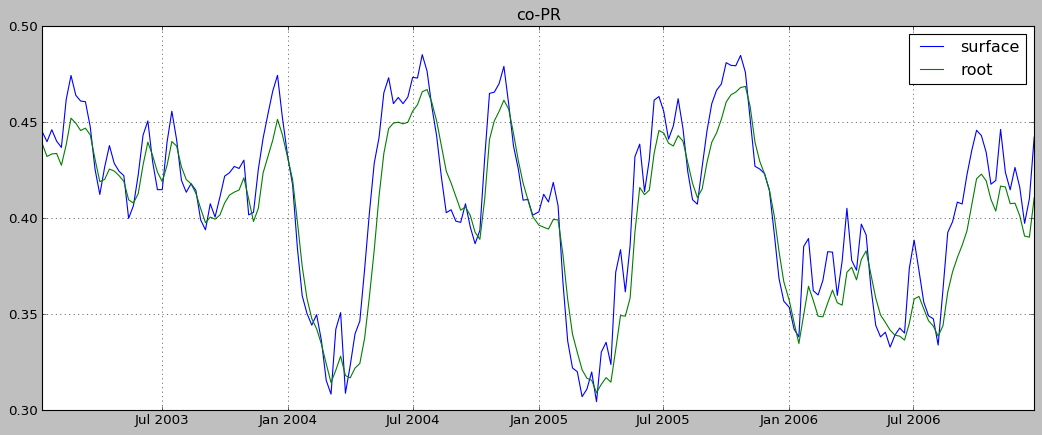

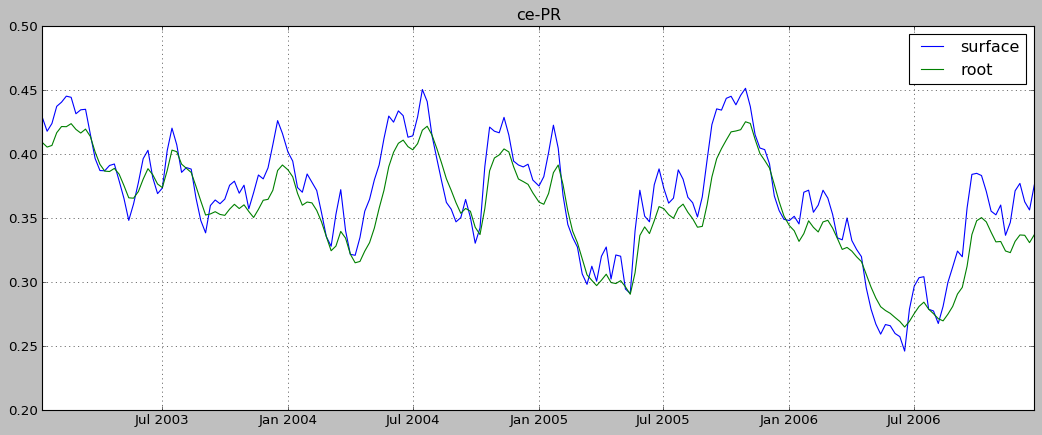

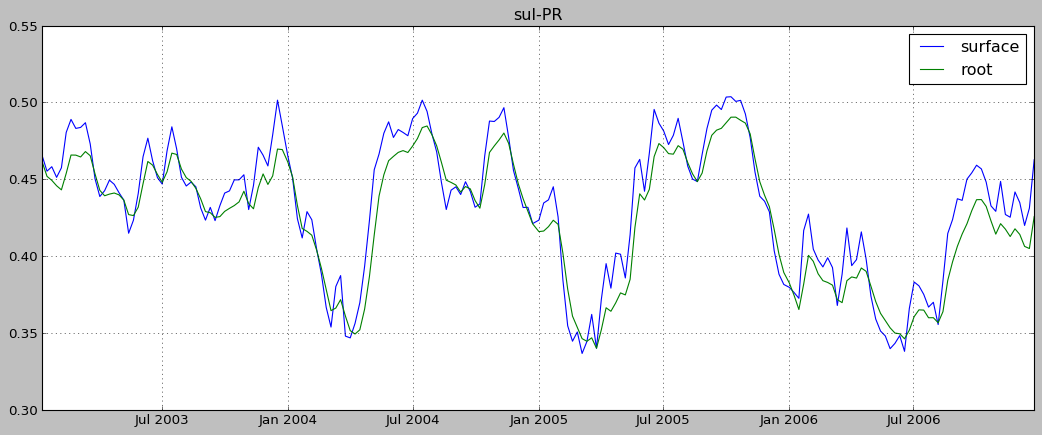

In [9]:
w=2
y1 = '2003'
y2 = '2006'
for region in surf_abs.columns:
    plt.figure(figsize=(16,6))
    plt.plot(surf_abs[region].loc[y1:y2].rolling(w).mean(),label='surface')
    plt.plot(root_abs[region].loc[y1:y2].rolling(w).mean(),label='root')
    #plt.plot(surf_abs[region].loc[y1:y2].rolling(w).mean()-root_abs[region].loc[y1:y2].rolling(w).mean(),label='S-R')
    plt.title(region);plt.grid();plt.legend();plt.show();plt.close()

#### Correlating root-zone and surface

In [11]:
from scipy import stats

for r in surf_abs.columns:
    print(r)
    print(stats.pearsonr(surf_abs[r],root_abs[r])[0])

#### preliminary conclusions
* Root-zone and surface moisture are extremely highly correlated (0.88 to 0.95).
* Surface SM is usually equal or higher than root-zone.
* cn-PR and ce-PR showed the lowest correlations (~0.88).